In [1]:
import pandas as pd 
import numpy as np
import re 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [2]:
data = pd.read_csv("book_reviews_sample.csv")

In [3]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [4]:
data['review_text_clean'] = data['reviewText'].str.lower()

In [8]:
data['review_text_clean'] = data.apply(lambda x : re.sub(r"([^\w\s])", " ", x['review_text_clean']), axis = 1)

In [9]:
data.head()

,index,reviewText,rating,review_text_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [10]:
vader_sentiment = SentimentIntensityAnalyzer()

In [22]:
data['vader_sentiment_score'] = data['review_text_clean'].apply(lambda review : vader_sentiment.polarity_scores(review)['compound'])

In [23]:
data.head(10)

,index,reviewText,rating,review_text_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767
5,7277,"Great book packed full with fast cars , crazy ...",4,great book packed full with fast cars crazy ...,0.7269
6,9781,I enjoyed the reader's digest very much. If I ...,4,i enjoyed the reader s digest very much if i ...,0.5106
7,4583,This series has been good and I look forward t...,5,this series has been good and i look forward t...,0.7906
8,9797,I just could not get into this book.I all ways...,1,i just could not get into this book i all ways...,0.0000
9,895,it was good to see where Dan and Elle was. And...,4,it was good to see where dan and elle was and...,0.8107


In [24]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)


In [25]:
data.head()

,index,reviewText,rating,review_text_clean,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='vader_sentiment_label'>

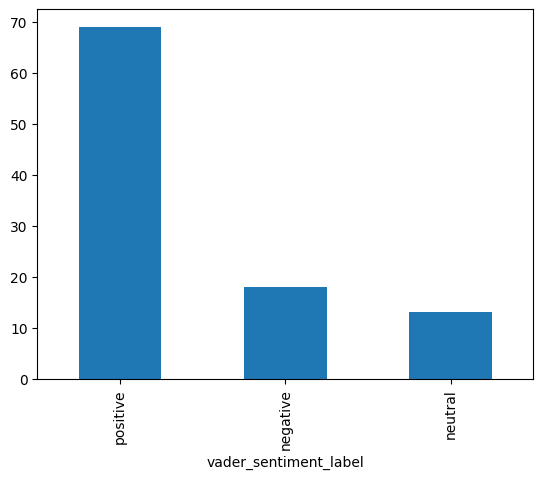

In [27]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [28]:
transformer_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\athin\anaconda3\envs\nlp_course_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\athin\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [31]:
transformer_labels = []

#for review in data['reviewText_clean'].values:
 #   sentiment_list = transformer_pipeline(review)
  #  sentiment_label = [sent['label'] for sent in sentiment_list]
   # transformer_labels.append(sentiment_label)
    
data#['transformer_sentiment_label'] = transformer_labels

data['transformer_sentiment_label'] = data['review_text_clean'].apply( lambda review : transformer_pipeline(review)[0]['label'] )

<Axes: xlabel='transformer_sentiment_label'>

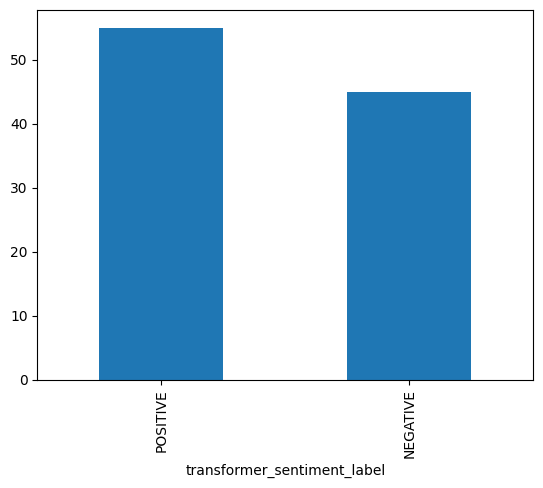

In [32]:
data['transformer_sentiment_label'].value_counts().plot.bar()
